In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import qiskit

import qiskit.ignis.verification.randomized_benchmarking as rb 


from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

IBMQ.load_accounts()

In [4]:
def circuit_generator():
    #Number of seeds (random sequences)
    nseeds = 5
    
    #Number of Cliffords in the sequence (start, stop, steps)
    nCliffs = np.arange(1,200,20)
    
    rb_pattern = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13]]
    
    length_multiplier = 1

    interleaved_gates = [['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0'], ['h 0']]
    
    rb_opts = {}
    rb_opts['length_vector'] = nCliffs
    rb_opts['nseeds'] = nseeds
    rb_opts['rb_pattern'] = rb_pattern
    rb_opts['length_multiplier'] = length_multiplier
    #rb_opts['align_cliffs'] = True
    rb_opts['interleaved_gates'] = interleaved_gates
    rb_original_circs, xdata, rb_interleaved_circs = rb.randomized_benchmarking_seq(**rb_opts)

    return rb_original_circs, rb_interleaved_circs, xdata, rb_opts

In [58]:
import warnings
warnings.filterwarnings('ignore')
rb_original_circs, rb_interleaved_circs, xdata, rb_opts = circuit_generator()

In [6]:
#Original RB circuits
for circ in rb_original_circs[0]:
    print(len(circ))
print(rb_original_circs[0][0])

106
1097
2071
3065
4093
5076
6082
7102
8105
9111
           ┌───┐ ┌─────┐┌───┐        ░  ┌───┐         ┌───┐ ┌───┐ ┌─┐         »
 qr_0: |0>─┤ H ├─┤ Sdg ├┤ H ├────────░──┤ H ├─────────┤ S ├─┤ H ├─┤M├─────────»
           ├───┤ └──░──┘├───┤┌─┐     ░  └───┘         └───┘ └───┘ └╥┘         »
 qr_1: |0>─┤ Z ├────░───┤ Z ├┤M├───────────────────────────────────╫──────────»
          ┌┴───┴┐ ┌───┐ ├───┤└╥┘     ░  ┌───┐         ┌───┐ ┌───┐  ║ ┌─┐      »
 qr_2: |0>┤ Sdg ├─┤ H ├─┤ Y ├─╫──────░──┤ Y ├─────────┤ H ├─┤ S ├──╫─┤M├──────»
          └┬───┬┘ ├───┤ ├───┤ ║    ┌───┐└─░─┘         ├───┤┌┴───┴┐ ║ └╥┘      »
 qr_3: |0>─┤ H ├──┤ H ├─┤ S ├─╫────┤ Y ├──░───────────┤ Y ├┤ Sdg ├─╫──╫───────»
           ├───┤  ├───┤ └─░─┘ ║    ├───┤┌───┐┌─┐      └───┘└─────┘ ║  ║       »
 qr_4: |0>─┤ H ├──┤ X ├───░───╫────┤ X ├┤ H ├┤M├───────────────────╫──╫───────»
           ├───┤  ├───┤   ░   ║    ├───┤├───┤└╥┘┌─┐                ║  ║       »
 qr_5: |0>─┤ H ├──┤ X ├───░───╫────┤ X ├┤ H ├─╫─┤M├────────────────╫──╫

In [7]:
#Original RB circuits
for circ in rb_interleaved_circs[0]:
    print(len(circ))
print(rb_interleaved_circs[0][0])

130
1677
3209
4771
6360
7903
9471
11055
12608
14183
           ┌───┐ ┌─────┐┌───┐  ░  ┌───┐  ░                 ┌───┐┌─────┐┌───┐┌─┐»
 qr_0: |0>─┤ H ├─┤ Sdg ├┤ H ├──░──┤ H ├──░─────────────────┤ Z ├┤ Sdg ├┤ H ├┤M├»
           ├───┤ └──░──┘├───┤  ░  ├───┤┌───┐┌─┐            └───┘└─────┘└───┘└╥┘»
 qr_1: |0>─┤ Z ├────░───┤ H ├──░──┤ X ├┤ H ├┤M├──────────────────────────────╫─»
          ┌┴───┴┐ ┌───┐ ├───┤  ░  ├───┤└─░─┘└╥┘            ┌───┐┌─────┐┌───┐ ║ »
 qr_2: |0>┤ Sdg ├─┤ H ├─┤ Y ├──░──┤ H ├──░───╫─────────────┤ X ├┤ Sdg ├┤ H ├─╫─»
          └┬───┬┘ ├───┤ ├───┤┌───┐└─░─┘┌───┐ ║             └─░─┘└┬───┬┘├───┤ ║ »
 qr_3: |0>─┤ H ├──┤ H ├─┤ S ├┤ Y ├──░──┤ H ├─╫───────────────░───┤ Z ├─┤ H ├─╫─»
           ├───┤  ├───┤ └─░─┘├───┤  ░  ├───┤ ║ ┌─┐           ░   └───┘ └───┘ ║ »
 qr_4: |0>─┤ H ├──┤ X ├───░──┤ H ├──░──┤ Z ├─╫─┤M├───────────────────────────╫─»
           ├───┤  ├───┤   ░  ├───┤  ░  ├───┤ ║ └╥┘┌─┐                        ║ »
 qr_5: |0>─┤ H ├──┤ X ├───░──┤ H ├──░──┤ Z ├─╫──╫─┤M├────

In [8]:
#Original RB circuits
backend = IBMQ.get_backend('ibmq_16_melbourne')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1000
original_result_list = []
for rb_seed,rb_circ_seed in enumerate(rb_original_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    job = qiskit.execute(new_rb_circ_seed, backend = backend, basis_gates = basis_gates, shots = shots)
    original_result_list.append(job.result()) 
print("Finished Executing Original Circuits")

Compiling seed 0


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 1


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 2


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 3


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 4


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Finished Executing Original Circuits


In [9]:
#Interleaved RB circuits
backend = IBMQ.get_backend('ibmq_16_melbourne')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1000
interleaved_result_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_interleaved_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    job = qiskit.execute(new_rb_circ_seed, backend = backend, basis_gates = basis_gates, shots = shots)
    interleaved_result_list.append(job.result())
print("Finished Executing Interleaved Circuits")

Compiling seed 0


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 1


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 2


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 3


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Compiling seed 4


c:\users\trongduong\quantum algorithm implementation\randomized_benchmarking\lib\site-packages\qiskit\providers\ibmq\ibmqjob.py:139: DeprecationWarning: The as_dict() method is deprecated, use to_dict().
  self._qobj_payload = qobj.as_dict()


Finished Executing Interleaved Circuits


In [10]:
#Create the original and interleaved RB fitter
original_rb_fit = rb.RBFitter(original_result_list, xdata, rb_opts['rb_pattern'])
interleaved_rb_fit = rb.RBFitter(interleaved_result_list, xdata, rb_opts['rb_pattern'])

In [11]:
#Calculate the joint fitter
joint_rb_fit = rb.InterleavedRBFitter(original_result_list, interleaved_result_list, xdata, rb_opts['rb_pattern'])

In [13]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_opts['rb_pattern']):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit interleaved RB:', joint_rb_fit.fit_int[patt_ind])

pattern: 0 - 1 qubit interleaved RB: {'alpha': 0.996866798282051, 'alpha_err': 0.0007673527576760734, 'alpha_c': 0.9876141804640645, 'alpha_c_err': 0.0008510921540607287, 'epc_est': 0.004640849627017385, 'epc_est_err': 0.0005723869865815833, 'systematic_err': 0.004640849627017385, 'systematic_err_L': 0.0, 'systematic_err_R': 0.00928169925403477}
pattern: 1 - 1 qubit interleaved RB: {'alpha': 0.9834896572613009, 'alpha_err': 0.0028649803952448833, 'alpha_c': 0.9659698620477059, 'alpha_c_err': 0.005676667860558686, 'epc_est': 0.008906954477987061, 'epc_est_err': 0.0032211002755246467, 'systematic_err': 0.008906954477987061, 'systematic_err_L': 0.0, 'systematic_err_R': 0.017813908955974123}
pattern: 2 - 1 qubit interleaved RB: {'alpha': 0.9930677231709828, 'alpha_err': 0.0017212662026142623, 'alpha_c': 0.9872701704173608, 'alpha_c_err': 0.0016112709504065318, 'epc_est': 0.002919011774498992, 'epc_est_err': 0.001183412136935871, 'systematic_err': 0.004013265054518211, 'systematic_err_L': -

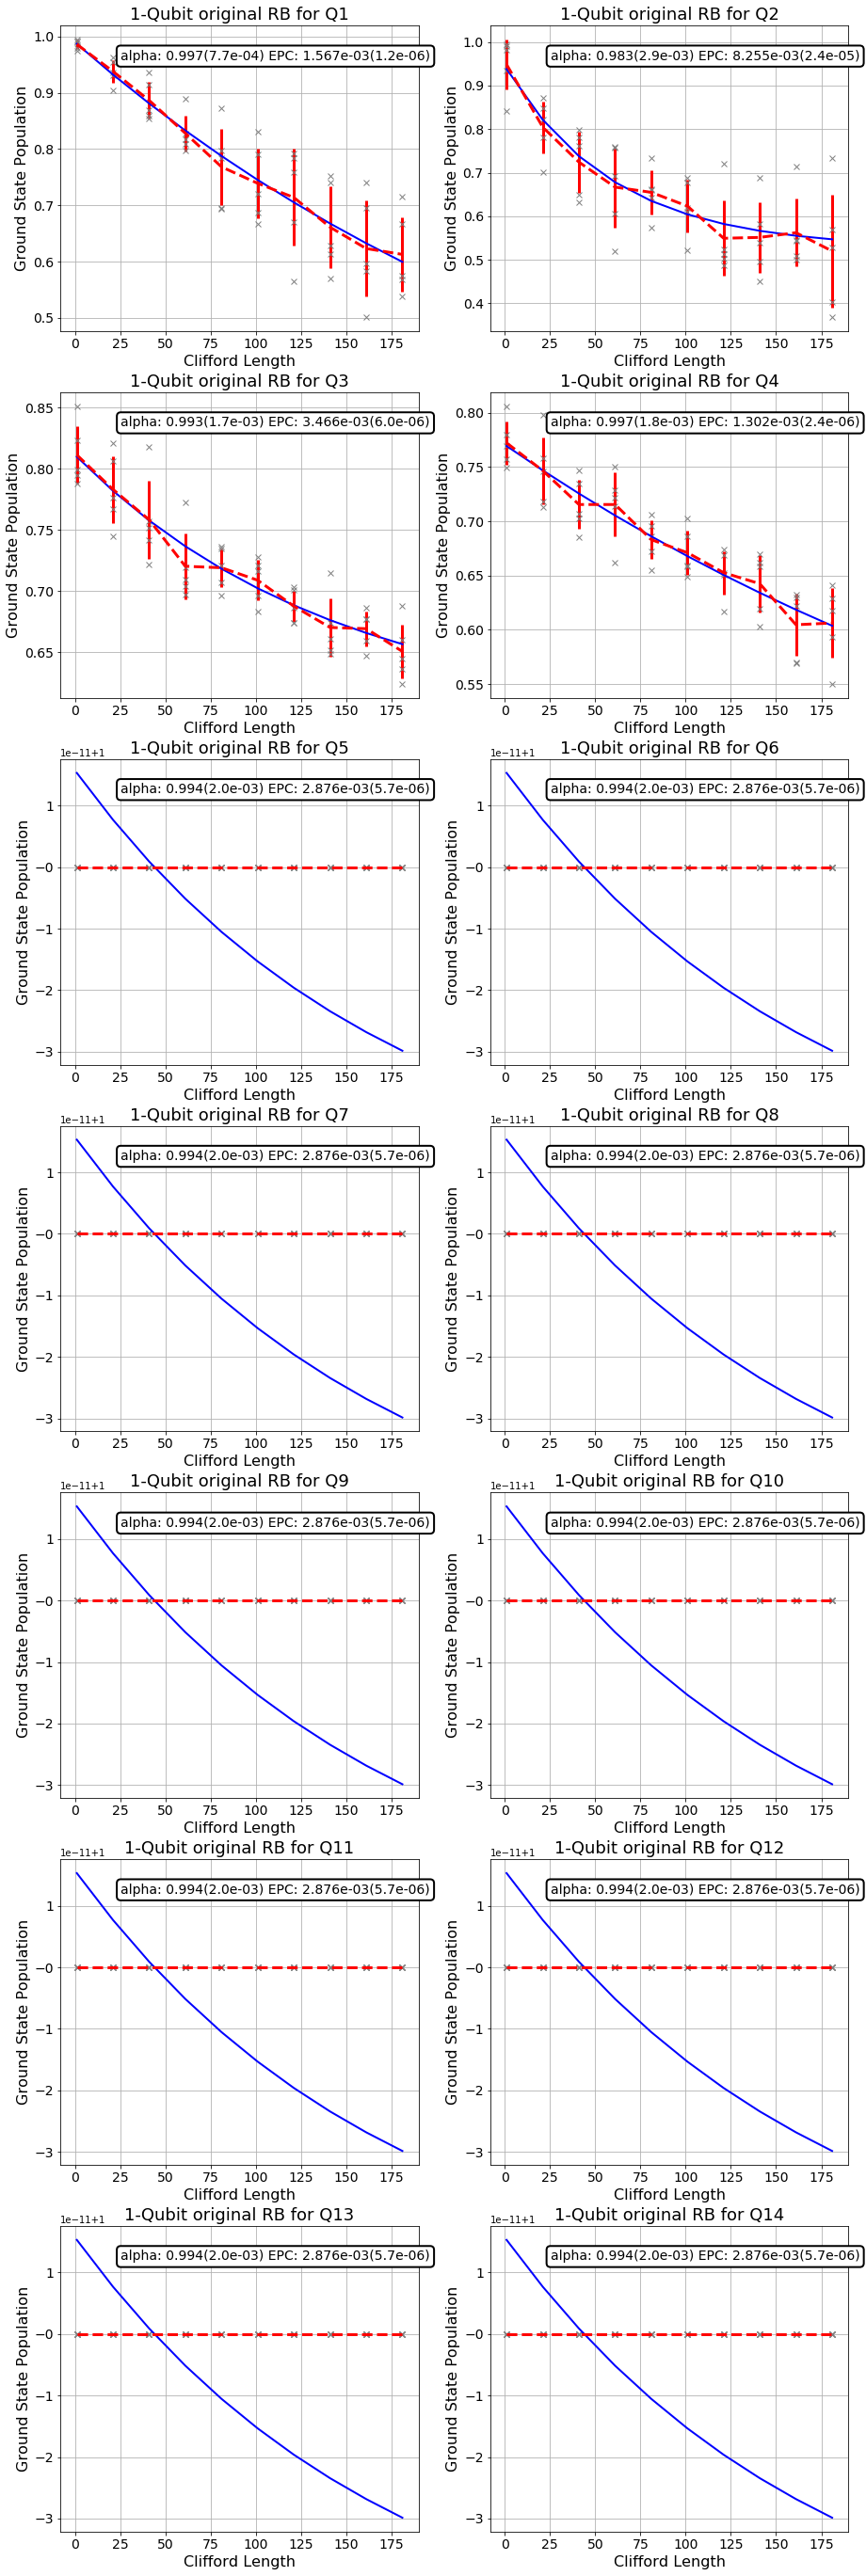

In [15]:
#Plot the joint RB data
nrows = 7
ncols = 2
figsize = [15,49]
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)

# Error and error limit for all qubits
original_epc_list = [] 
original_epc_err_list = []

for i, ax in enumerate(ax.flat):
    pattern_ind = i
    original_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)
    title = '{}-Qubit original RB for Q{}'.format(len(rb_opts['rb_pattern'][i]), i+1)
    ax.set_title(title, fontsize=18)
    
    original_epc_list.append(original_rb_fit.fit[i]['epc'])
    original_epc_err_list.append(original_rb_fit.fit[i]['epc_err'])
    
plt.show()

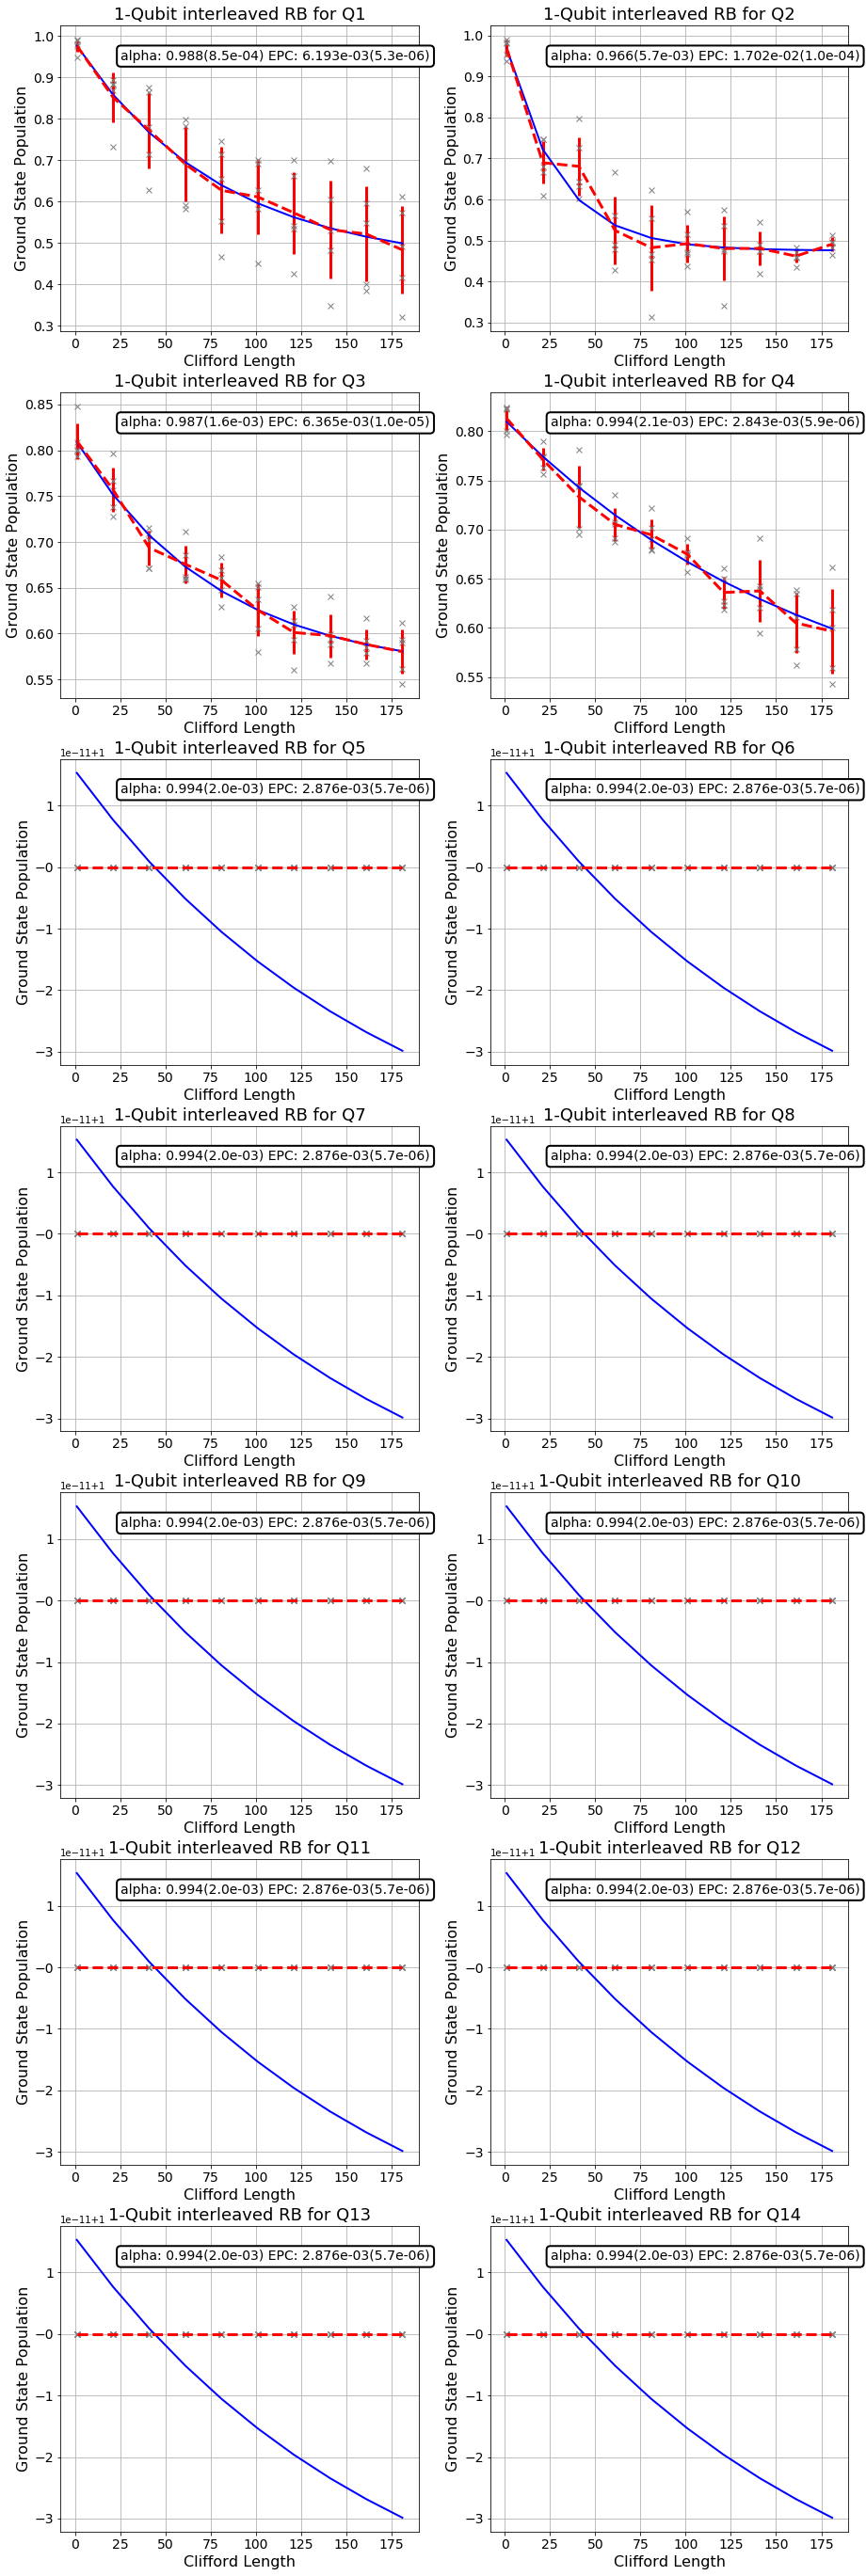

In [17]:
#Plot the joint RB data
nrows = 7
ncols = 2
figsize = [15,49]
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)

# Error and error limit for all qubits
interleaved_epc_list = [] 
interleaved_epc_err_list = []

for i, ax in enumerate(ax.flat):
    pattern_ind = i
    interleaved_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)
    title = '{}-Qubit interleaved RB for Q{}'.format(len(rb_opts['rb_pattern'][i]), i+1)
    ax.set_title(title, fontsize=18)
    
    interleaved_epc_list.append(interleaved_rb_fit.fit[i]['epc'])
    interleaved_epc_err_list.append(interleaved_rb_fit.fit[i]['epc_err'])
    
plt.show()

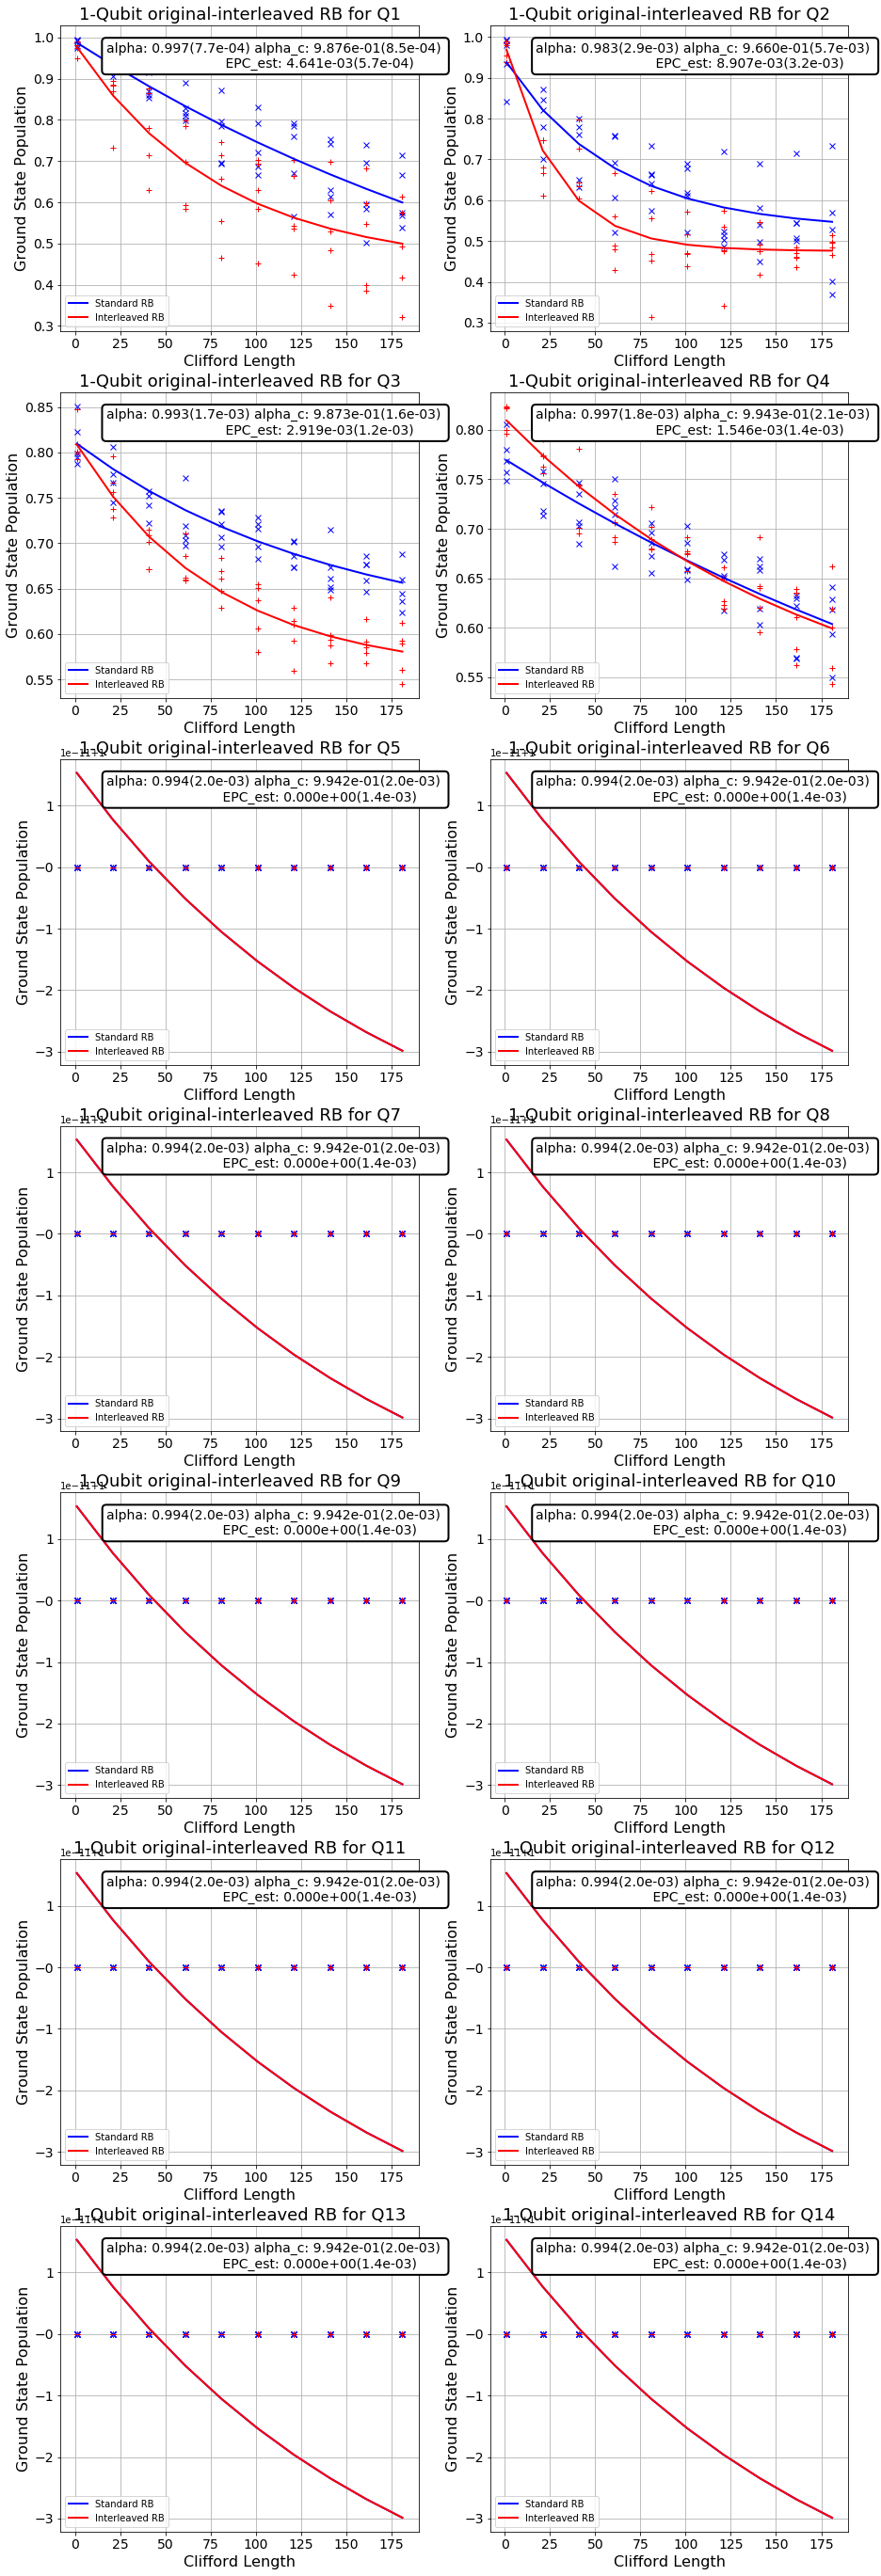

In [47]:
#Plot the joint RB data
nrows = 7
ncols = 2
figsize = [15,49]
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)

for i, ax in enumerate(ax.flat):
    pattern_ind = i
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)
    title = '{}-Qubit original-interleaved RB for Q{}'.format(len(rb_opts['rb_pattern'][i]), i+1)
    ax.set_title(title, fontsize=18)
    
plt.show()

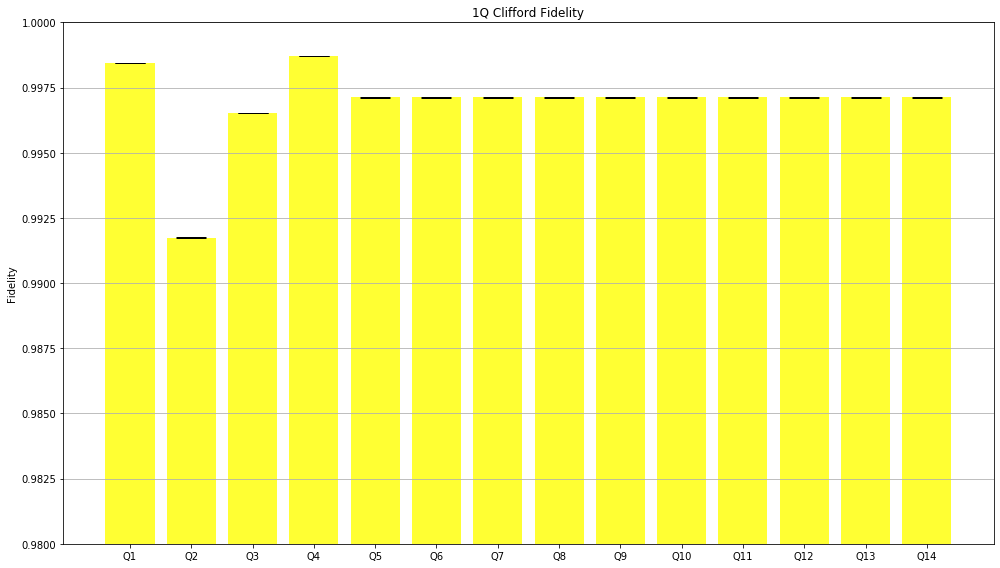

In [54]:
qubit_list = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14']
x_pos = np.arange(len(qubit_list))
fidelities = original_epc_list.copy()
fidelities = [1 - fid for fid in fidelities]

fig, ax = plt.subplots(figsize=(14,8))
ax.bar(x_pos, fidelities, yerr = original_epc_err_list, align='center', alpha=0.8, color = 'yellow', ecolor='black', capsize=15)
ax.set_ylim([0.98,1])
ax.set_ylabel('Fidelity')
ax.set_xticks(x_pos)
ax.set_xticklabels(qubit_list)
ax.set_title('1Q Clifford Fidelity')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

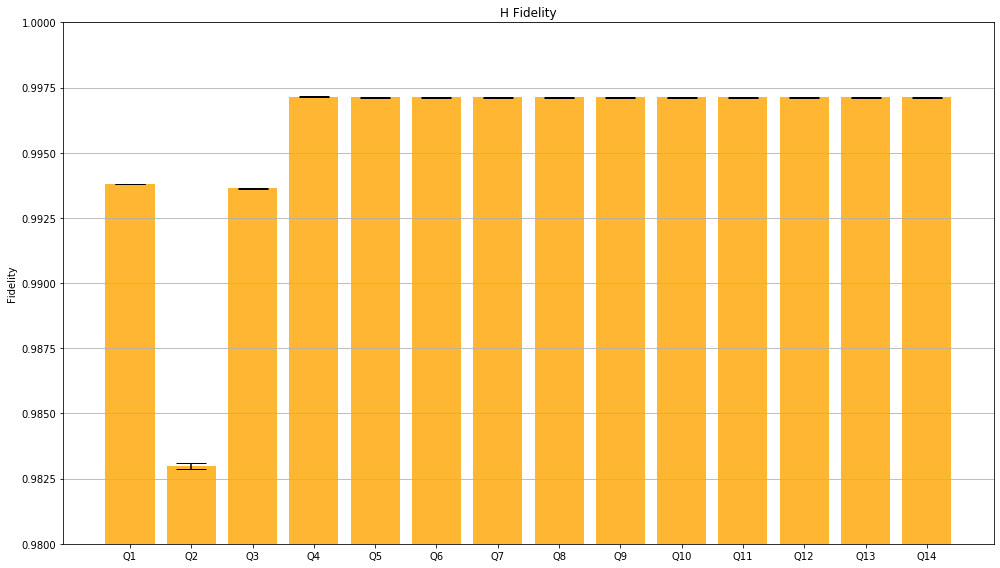

In [53]:
qubit_list = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14']
x_pos = np.arange(len(qubit_list))
fidelities = interleaved_epc_list.copy()
fidelities = [1 - fid for fid in fidelities]

fig, ax = plt.subplots(figsize=(14,8))
ax.bar(x_pos, fidelities, yerr = interleaved_epc_err_list, align='center', alpha=0.8, color = 'orange', ecolor='black', capsize=15)
ax.set_ylim([0.98,1])
ax.set_ylabel('Fidelity')
ax.set_xticks(x_pos)
ax.set_xticklabels(qubit_list)
ax.set_title('H Fidelity')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()